# Baseline Datasets

## Load Datasets

In [1]:
import random
import numpy as np
import pandas as pd
from tensorflow.random import set_seed
random.seed(2024)
np.random.seed(2024)
set_seed(2024)

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
X_train = df_train.drop(columns = ["converter"])
Y_train = df_train.converter
X_test = df_test.drop(columns = ["converter"])
Y_test = df_test["converter"]

## Normalization
1. scale numerical columns
2. apply one-hot encoding to categorical columns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Initialize the StandardScaler and OneHotEncoder
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False)

# scale
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# encode
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# concatenate
X_train_preprocessed = np.concatenate([X_train_scaled, X_train_encoded], axis=1)
X_test_preprocessed = np.concatenate([X_test_scaled, X_test_encoded], axis=1)

C:\Users\43115\anaconda3\envs\python_310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Neural Network

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

NNmodel = Sequential()
NNmodel.add(Dense(8, input_dim = len(X_train_preprocessed[0,:]), activation = "relu"))
NNmodel.add(Dense(1, activation = "sigmoid")) # binary
NNmodel.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 184       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
NNmodel.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = NNmodel.fit(x = X_train_preprocessed, y = Y_train, epochs = 200, validation_split = 0.2)


Epoch 1/200


20/20 [==============================] - 1s 9ms/step - loss: 0.8490 - accuracy: 0.3997 - val_loss: 0.8206 - val_accuracy: 0.4551
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7783 - accuracy: 0.4543 - val_loss: 0.7597 - val_accuracy: 0.4808
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7223 - accuracy: 0.5329 - val_loss: 0.7137 - val_accuracy: 0.5321
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.6228 - val_loss: 0.6750 - val_accuracy: 0.6154
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6838 - val_loss: 0.6435 - val_accuracy: 0.6603
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6072 - accuracy: 0.7319 - val_loss: 0.6161 - val_accuracy: 0.7115
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7464 - val_loss: 0.5893 - val_accuracy: 0.7244
Epoch 8/20

Epoch 54/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8186 - val_loss: 0.4764 - val_accuracy: 0.7628
Epoch 55/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8202 - val_loss: 0.4757 - val_accuracy: 0.7628
Epoch 56/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8202 - val_loss: 0.4758 - val_accuracy: 0.7628
Epoch 57/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8186 - val_loss: 0.4755 - val_accuracy: 0.7628
Epoch 58/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8170 - val_loss: 0.4760 - val_accuracy: 0.7628
Epoch 59/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8186 - val_loss: 0.4749 - val_accuracy: 0.7628
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8186 - val_loss: 0.4757 - val_accuracy: 0.7628
Epoch 

20/20 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8315 - val_loss: 0.4806 - val_accuracy: 0.7692
Epoch 112/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8315 - val_loss: 0.4818 - val_accuracy: 0.7692
Epoch 113/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8331 - val_loss: 0.4824 - val_accuracy: 0.7756
Epoch 114/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8299 - val_loss: 0.4821 - val_accuracy: 0.7756
Epoch 115/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8331 - val_loss: 0.4821 - val_accuracy: 0.7692
Epoch 116/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8299 - val_loss: 0.4824 - val_accuracy: 0.7692
Epoch 117/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8331 - val_loss: 0.4831 - val_accuracy: 0.7692
Epoch 118/200

20/20 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8347 - val_loss: 0.4952 - val_accuracy: 0.7628
Epoch 169/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8347 - val_loss: 0.4966 - val_accuracy: 0.7628
Epoch 170/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8331 - val_loss: 0.4969 - val_accuracy: 0.7692
Epoch 171/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8331 - val_loss: 0.4976 - val_accuracy: 0.7628
Epoch 172/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8379 - val_loss: 0.4975 - val_accuracy: 0.7628
Epoch 173/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8363 - val_loss: 0.4985 - val_accuracy: 0.7628
Epoch 174/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8347 - val_loss: 0.4973 - val_accuracy: 0.7628
Epoch 175/200

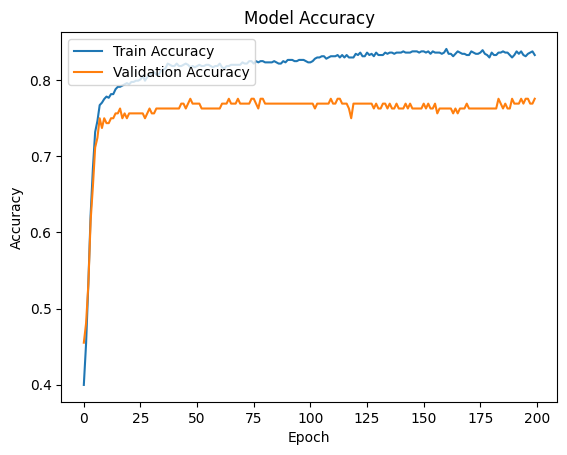

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.savefig('Graphs/NN1_accuracy.png')
plt.show()
plt.close()

## Test dataset

11/11 [==============================] - 0s 800us/step
Test Accuracy: 77.61%


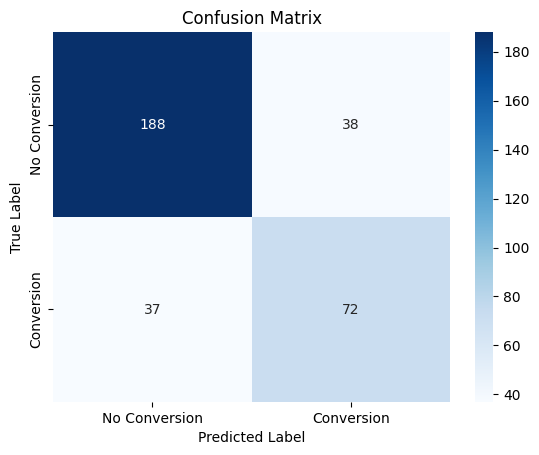

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

test_pred_prob = NNmodel.predict(X_test_preprocessed)
test_preds = (test_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(Y_test, test_preds)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
cm = confusion_matrix(Y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Conversion', 'Conversion'], yticklabels=['No Conversion', 'Conversion'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.savefig('Graphs/NN1_cm1.png')
plt.show()
plt.close()

# Completer Dataset

## Datasets

In [7]:
df_train = pd.read_csv("train_completer.csv")
df_test = pd.read_csv("test_completer.csv")
X_train = df_train.drop(columns = ["converter"])
Y_train = df_train.converter
X_test = df_test.drop(columns = ["converter"])
Y_test = df_test["converter"]

## Normalization

In [8]:
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Initialize the StandardScaler and OneHotEncoder
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False)

# scale
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# encode
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# concatenate
X_train_preprocessed = np.concatenate([X_train_scaled, X_train_encoded], axis=1)
X_test_preprocessed = np.concatenate([X_test_scaled, X_test_encoded], axis=1)

C:\Users\43115\anaconda3\envs\python_310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## NN model

In [9]:
NNmodel = Sequential()
NNmodel.add(Dense(8, input_dim = len(X_train_preprocessed[0,:]), activation = "relu"))
NNmodel.add(Dense(1, activation = "sigmoid")) # binary
NNmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 184       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
NNmodel.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = NNmodel.fit(x = X_train_preprocessed, y = Y_train, epochs = 200, validation_split = 0.2)

Epoch 1/200
5/5 [==============================] - 1s 31ms/step - loss: 0.6886 - accuracy: 0.5232 - val_loss: 0.8398 - val_accuracy: 0.3684
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6725 - accuracy: 0.5430 - val_loss: 0.8209 - val_accuracy: 0.3684
Epoch 3/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6576 - accuracy: 0.5695 - val_loss: 0.8035 - val_accuracy: 0.3684
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6453 - accuracy: 0.5894 - val_loss: 0.7867 - val_accuracy: 0.4211
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6332 - accuracy: 0.6093 - val_loss: 0.7714 - val_accuracy: 0.4211
Epoch 6/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6223 - accuracy: 0.6424 - val_loss: 0.7581 - val_accuracy: 0.4737
Epoch 7/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6120 - accuracy: 0.6689 - val_loss: 0.7458 - val_accuracy: 0.5263
Epoch 8/200
5/5 [=========

5/5 [==============================] - 0s 7ms/step - loss: 0.3744 - accuracy: 0.8411 - val_loss: 0.4764 - val_accuracy: 0.8158
Epoch 60/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3728 - accuracy: 0.8411 - val_loss: 0.4765 - val_accuracy: 0.8158
Epoch 61/200
5/5 [==============================] - 0s 7ms/step - loss: 0.3709 - accuracy: 0.8411 - val_loss: 0.4753 - val_accuracy: 0.8158
Epoch 62/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3692 - accuracy: 0.8477 - val_loss: 0.4743 - val_accuracy: 0.8158
Epoch 63/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3676 - accuracy: 0.8477 - val_loss: 0.4737 - val_accuracy: 0.8158
Epoch 64/200
5/5 [==============================] - 0s 7ms/step - loss: 0.3660 - accuracy: 0.8477 - val_loss: 0.4727 - val_accuracy: 0.8158
Epoch 65/200
5/5 [==============================] - 0s 7ms/step - loss: 0.3642 - accuracy: 0.8477 - val_loss: 0.4728 - val_accuracy: 0.8158
Epoch 66/200
5/5 [===============

5/5 [==============================] - 0s 7ms/step - loss: 0.3014 - accuracy: 0.9073 - val_loss: 0.4447 - val_accuracy: 0.8158
Epoch 118/200
5/5 [==============================] - 0s 7ms/step - loss: 0.3005 - accuracy: 0.9073 - val_loss: 0.4440 - val_accuracy: 0.8158
Epoch 119/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2997 - accuracy: 0.9073 - val_loss: 0.4440 - val_accuracy: 0.8158
Epoch 120/200
5/5 [==============================] - 0s 8ms/step - loss: 0.2989 - accuracy: 0.9073 - val_loss: 0.4428 - val_accuracy: 0.8158
Epoch 121/200
5/5 [==============================] - 0s 8ms/step - loss: 0.2979 - accuracy: 0.9073 - val_loss: 0.4422 - val_accuracy: 0.8158
Epoch 122/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2970 - accuracy: 0.9073 - val_loss: 0.4418 - val_accuracy: 0.8158
Epoch 123/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2963 - accuracy: 0.9073 - val_loss: 0.4420 - val_accuracy: 0.8158
Epoch 124/200
5/5 [========

5/5 [==============================] - 0s 8ms/step - loss: 0.2597 - accuracy: 0.9073 - val_loss: 0.4247 - val_accuracy: 0.8158
Epoch 176/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2592 - accuracy: 0.9073 - val_loss: 0.4251 - val_accuracy: 0.8158
Epoch 177/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2585 - accuracy: 0.9073 - val_loss: 0.4253 - val_accuracy: 0.8158
Epoch 178/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2580 - accuracy: 0.9073 - val_loss: 0.4249 - val_accuracy: 0.8158
Epoch 179/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2573 - accuracy: 0.9073 - val_loss: 0.4253 - val_accuracy: 0.8158
Epoch 180/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2569 - accuracy: 0.9073 - val_loss: 0.4249 - val_accuracy: 0.8158
Epoch 181/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2562 - accuracy: 0.9073 - val_loss: 0.4254 - val_accuracy: 0.8158
Epoch 182/200
5/5 [========

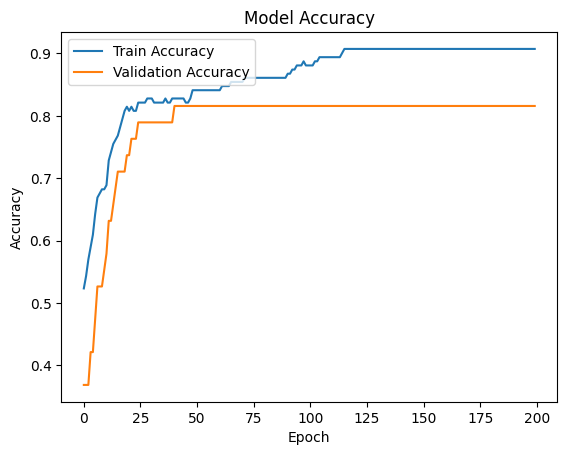

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.savefig('Graphs/NN2_accuracy.png')
plt.show()
plt.close()

3/3 [==============================] - 0s 1ms/step
Test Accuracy: 79.01%


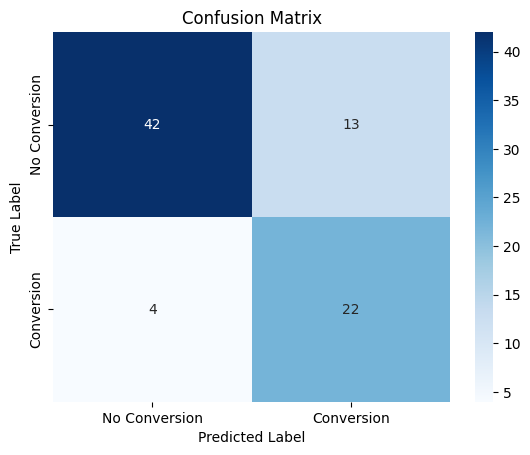

In [12]:
test_pred_prob = NNmodel.predict(X_test_preprocessed)
test_preds = (test_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(Y_test, test_preds)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
cm = confusion_matrix(Y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Conversion', 'Conversion'], yticklabels=['No Conversion', 'Conversion'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.savefig('Graphs/NN2_cm2.png')
plt.show()
plt.close()